<a href="https://colab.research.google.com/github/parchambault59/get-data-from-lucca-api/blob/master/CRM_data_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Context of the analysis:

>  You have an extract of one hour's sales data from the CRM.

- Each line corresponds to a passenger.
- Imagine that each sale is associated with a customer segment (e.g. business travel during the week, leisure travel at weekends).
- Your task is to analyze this data to identify trends and make relevant recommendations.

>  Your objectives:

- Select **2 to 3 key trends** in customer behavior or bookings that seem **most relevant at the moment**.
- Identify and analyze the sales channels used.
- Formulate strategic recommendations based on these observations.

In [ ]:
import pandas as pd

Filename: CRM Data insight- Database.xlsx

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving CRM Data insight- Database.xlsx to CRM Data insight- Database.xlsx
User uploaded file "CRM Data insight- Database.xlsx" with length 98458 bytes


To get familiar with the data, I wish to follow the steps provided in this [guide](https://sundayselectstar.substack.com/p/explorer-une-table-de-donnees-en)

# Step 1: Get familiar with dataset

## a. Overview dataset

In [ ]:
# Replace 'CRM Data insight- Database.xlsx' with the actual filename if it's different after uploading
df = pd.read_excel('CRM Data insight- Database.xlsx')
display(df)

,Order,Train,Service_Code,Service_Description,Emission_Date_Time,Amount €,Passenger_Route,Coach,Seat,Class,Offer_Type,Sales Channel,Date_Time_Departure,Date_Time_Arrival,Passenger_Name,Passenger_Surname,Passanger_Type,Flag_Round_Trip,Flag_Round_Trip_2
0,1661582793,6146,650002,Business,2025-03-11 11:49:48,45.0,MARSEILLE-SAINT-CHARLES -> PARIS-GARE-DE-LYON,2,10D,1 Business,BASE,Trenitalia Web France,2025-06-21 09:53:00,2025-06-21 13:20:00,S,CdyyiUX,ADULTO,N,NaN
1,1661584024,6108,650006,Standard Brio,2025-03-11 11:51:06,43.0,AVIGNON TGV -> PARIS-GARE-DE-LYON,5,5D,2? Standard,BASE,Trenitalia Web France,2025-06-15 16:25:00,2025-06-15 19:32:00,j,crdutzdr,ADULTO,N,NaN
2,1661574074,6655,650005,Standard,2025-03-11 11:34:15,49.0,PARIS-GARE-DE-LYON -> LYON PART DIEU,7,15D,2? Standard,BASE,Agences,2025-03-11 20:00:00,2025-03-11 21:56:00,Y,iLiIN,ADULTO,N,NaN
3,1661573685,6105,650005,Standard,2025-03-11 11:34:24,38.0,PARIS-GARE-DE-LYON -> AVIGNON TGV,7,2A,2? Standard,BASE,Trenitalia Web France,2025-07-04 11:30:00,2025-07-04 14:38:00,M,Chirldydind,ADULTO,N,NaN
4,1661573685,6105,650005,Standard,2025-03-11 11:34:24,38.0,PARIS-GARE-DE-LYON -> AVIGNON TGV,7,2B,2? Standard,BASE,Trenitalia Web France,2025-07-04 11:30:00,2025-07-04 14:38:00,C,iltidr,ADULTO,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,1661562122,9296,660003,Business Brio,2025-03-11 11:16:54,85.0,TORINO PORTA SUSA -> PARIS-GARE-DE-LYON,3,6A,1? Business,BASE,Trenitalia Web France,2025-08-24 16:40:00,2025-08-24 22:34:00,D,D intdni,ADULTO,Y,R
841,1661562122,9296,660003,Business Brio,2025-03-11 11:16:54,42.5,TORINO PORTA SUSA -> PARIS-GARE-DE-LYON,3,5B,1? Business,BASE,Trenitalia Web France,2025-08-24 16:40:00,2025-08-24 22:34:00,V,D intdni,RAGAZZO,Y,R
842,1661562122,9281,660003,Business Brio,2025-03-11 11:16:54,42.5,PARIS-GARE-DE-LYON -> TORINO PORTA SUSA,3,6B,1? Business,BASE,Trenitalia Web France,2025-08-10 07:30:00,2025-08-10 13:20:00,V,D intdni,RAGAZZO,Y,A
843,1661562122,9281,660003,Business Brio,2025-03-11 11:16:54,42.5,PARIS-GARE-DE-LYON -> TORINO PORTA SUSA,3,6A,1? Business,BASE,Trenitalia Web France,2025-08-10 07:30:00,2025-08-10 13:20:00,F,D intdni,RAGAZZO,Y,A


1. Data structure:
* 1 line is 1 passenger on 1 travel (1 origin and 1 destination)
* if passenger does a round trip, flag_round_trip = Y, flag_round_trip_2 gives detail wether trip is back or forth
* 1 Order can contain 1+ travels

2. Data quality:
* passenger_route does not have a database format
* class column has unexpected values (e.g. 2? Standard)
* flag_round_trip should be boolean

3. Column naming:
* order instead of order_id
* amount has special € caracter
* sales channel has a whitespace instead of underscore

4. Valuable data:
* Class
* Sales_channel
* Passenger_type


# Clean column names



I follow this [guide](https://support.dataquest.io/en/articles/819-messy-column-names-here-s-how-to-fix-them-with-pandas)

In [ ]:
df.columns

Index(['Order', 'Train', 'Service_Code', 'Service_Description',
       'Emission_Date_Time', 'Amount €', 'Passenger_Route', 'Coach', 'Seat',
       'Class', 'Offer_Type', 'Sales Channel ', 'Date_Time_Departure',
       'Date_Time_Arrival', 'Passenger_Name', 'Passenger_Surname',
       'Passanger_Type', 'Flag_Round_Trip', 'Flag_Round_Trip_2'],
      dtype='object')

In [ ]:
def clean_column_names(df):
    df.columns = (df.columns
               .str.replace("[()€$]", "", regex=True) # remove special caracters
               .str.strip() # remove trailing whitespaces
               .str.lower() # cast to lowercase
               .str.replace(" ", "_") # replace spaces with underscores
    )
    return df

df = clean_column_names(df)
df.columns

Index(['order', 'train', 'service_code', 'service_description',
       'emission_date_time', 'amount', 'passenger_route', 'coach', 'seat',
       'class', 'offer_type', 'sales_channel', 'date_time_departure',
       'date_time_arrival', 'passenger_name', 'passenger_surname',
       'passanger_type', 'flag_round_trip', 'flag_round_trip_2'],
      dtype='object')

In [ ]:
df = df.rename(columns={'order': 'order_id', 'train':'train_number', 'flag_round_trip':'is_round_trip','flag_round_trip_2':'round_trip_way'})

In [ ]:
df.columns

Index(['order_id', 'train_number', 'service_code', 'service_description',
       'emission_date_time', 'amount', 'passenger_route', 'coach', 'seat',
       'class', 'offer_type', 'sales_channel', 'date_time_departure',
       'date_time_arrival', 'passenger_name', 'passenger_surname',
       'passanger_type', 'is_round_trip', 'round_trip_way'],
      dtype='object')

# Check data quality

## Formats

In [ ]:
df.dtypes

,0
order_id,int64
train_number,int64
service_code,int64
service_description,object
emission_date_time,datetime64[ns]
amount,float64
passenger_route,object
coach,int64
seat,object
class,object


No issues especially datetimes, ids, and numbers have right format

## Split passenger_route column

In [ ]:
# prompt: passenger_route values format: "MARSEILLE-SAINT-CHARLES -> PARIS-GARE-DE-LYON", which is "origin -> destination". How can I create 2 new columns: origin & destination

df[['origin', 'destination']] = df['passenger_route'].str.split(' -> ', expand=True)
display(df)

,order_id,train_number,service_code,service_description,emission_date_time,amount,passenger_route,coach,seat,class,...,sales_channel,date_time_departure,date_time_arrival,passenger_name,passenger_surname,passanger_type,is_round_trip,round_trip_way,origin,destination
0,1661582793,6146,650002,Business,2025-03-11 11:49:48,45.0,MARSEILLE-SAINT-CHARLES -> PARIS-GARE-DE-LYON,2,10D,1 Business,...,Trenitalia Web France,2025-06-21 09:53:00,2025-06-21 13:20:00,S,CdyyiUX,ADULTO,N,NaN,MARSEILLE-SAINT-CHARLES,PARIS-GARE-DE-LYON
1,1661584024,6108,650006,Standard Brio,2025-03-11 11:51:06,43.0,AVIGNON TGV -> PARIS-GARE-DE-LYON,5,5D,2? Standard,...,Trenitalia Web France,2025-06-15 16:25:00,2025-06-15 19:32:00,j,crdutzdr,ADULTO,N,NaN,AVIGNON TGV,PARIS-GARE-DE-LYON
2,1661574074,6655,650005,Standard,2025-03-11 11:34:15,49.0,PARIS-GARE-DE-LYON -> LYON PART DIEU,7,15D,2? Standard,...,Agences,2025-03-11 20:00:00,2025-03-11 21:56:00,Y,iLiIN,ADULTO,N,NaN,PARIS-GARE-DE-LYON,LYON PART DIEU
3,1661573685,6105,650005,Standard,2025-03-11 11:34:24,38.0,PARIS-GARE-DE-LYON -> AVIGNON TGV,7,2A,2? Standard,...,Trenitalia Web France,2025-07-04 11:30:00,2025-07-04 14:38:00,M,Chirldydind,ADULTO,N,NaN,PARIS-GARE-DE-LYON,AVIGNON TGV
4,1661573685,6105,650005,Standard,2025-03-11 11:34:24,38.0,PARIS-GARE-DE-LYON -> AVIGNON TGV,7,2B,2? Standard,...,Trenitalia Web France,2025-07-04 11:30:00,2025-07-04 14:38:00,C,iltidr,ADULTO,N,NaN,PARIS-GARE-DE-LYON,AVIGNON TGV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,1661562122,9296,660003,Business Brio,2025-03-11 11:16:54,85.0,TORINO PORTA SUSA -> PARIS-GARE-DE-LYON,3,6A,1? Business,...,Trenitalia Web France,2025-08-24 16:40:00,2025-08-24 22:34:00,D,D intdni,ADULTO,Y,R,TORINO PORTA SUSA,PARIS-GARE-DE-LYON
841,1661562122,9296,660003,Business Brio,2025-03-11 11:16:54,42.5,TORINO PORTA SUSA -> PARIS-GARE-DE-LYON,3,5B,1? Business,...,Trenitalia Web France,2025-08-24 16:40:00,2025-08-24 22:34:00,V,D intdni,RAGAZZO,Y,R,TORINO PORTA SUSA,PARIS-GARE-DE-LYON
842,1661562122,9281,660003,Business Brio,2025-03-11 11:16:54,42.5,PARIS-GARE-DE-LYON -> TORINO PORTA SUSA,3,6B,1? Business,...,Trenitalia Web France,2025-08-10 07:30:00,2025-08-10 13:20:00,V,D intdni,RAGAZZO,Y,A,PARIS-GARE-DE-LYON,TORINO PORTA SUSA
843,1661562122,9281,660003,Business Brio,2025-03-11 11:16:54,42.5,PARIS-GARE-DE-LYON -> TORINO PORTA SUSA,3,6A,1? Business,...,Trenitalia Web France,2025-08-10 07:30:00,2025-08-10 13:20:00,F,D intdni,RAGAZZO,Y,A,PARIS-GARE-DE-LYON,TORINO PORTA SUSA


## Clean class values

In [ ]:
# prompt: How can I get distinct values of service_description for each distinct class?

distinct_services_by_class = df.groupby('class')['service_description'].unique()
distinct_services_by_class

,service_description
class,
1 Business,[Business]
1? Business,"[Business, BUSINESS, Business Brio]"
2? Standard,"[Standard Brio, Standard, STANDARD]"
Executive,[Executive]


## c: Understand columns

1. Columns to dig in:
* difference between ser

### 1. Unclear column names

* service_code: probably foreign key for service table
* service_description: travel class (e.g. standard, business)
* emission_date_time: datetime of purchase
* class: travel class with more detail (e.g. standard brio)
* offer_type: commercial offer passenger benefited from

### 2. Useful columns

I want to create customer segments (business travel during the week, leisure travel at week-ends) and identify trends in
- customer behavior: when and how do customers travel (e.g. business customers travel during the week)
- customer booking: when and how do customers book (e.g. business customers book 2 months in advance on Trenitalia Web platform)
In order to make strategic recommendations to commercial marketing officer

Therefore, I should focus on the following columns:

1. when customers travel: Datetime departure
2. how customers travel: Service description or class
3. when customers book: emission datetime
4. how customers book: sales channel

## d: Identify date span

In [ ]:
quant = df[['emission_date_time','date_time_departure']]
quant.describe()

,emission_date_time,date_time_departure
count,845,845
mean,2025-03-11 11:34:29.622485248,2025-06-08 16:57:25.562129920
min,2025-03-11 11:05:16,2025-02-23 20:38:00
25%,2025-03-11 11:20:22,2025-04-10 15:18:00
50%,2025-03-11 11:34:43,2025-06-22 18:49:00
75%,2025-03-11 11:48:29,2025-07-19 10:28:00
max,2025-03-11 12:04:55,2025-09-05 16:40:00


Sales are made within 1 hour (11:05AM and 12:05PM) on March 11th 2025

Travels are made between February 23 2025(2 weeks before emission date?) until September 5 2025(6 months after date emission date)

## e: Check NaN value span

In [ ]:
nan_values_count = df.isnull().sum()
display(nan_values_count)

,0
order_id,0
train_code,0
service_code,0
service_description,0
emission_date_time,0
amount,1
passenger_route,0
coach,0
seat,0
class,0


1 value is missing is Amount column

503 out of 845 values missing in flag_round_trip_2, because all trips are not round trips

Conclusion: No NaN issue on columns we focus on.

## f: Explore modalities

Qualitative variables I want to focus on: class, service description & sales channel

First, I want to choose between class & service_description

I will install pandasql to work with SQL in this note book

In [ ]:
%pip install pandasql -q # -q to avoid verbose

  Preparing metadata (setup.py) ... done


In [ ]:
from pandasql import sqldf

In [ ]:
pysqldf = lambda q: sqldf(q, globals())

I compare class & service description:

In [ ]:
class_and_service_description = """SELECT DISTINCT class, service_description from df"""

result = pysqldf(class_and_service_description)

print(result)

         class service_description
0   1 Business            Business
1  2? Standard       Standard Brio
2  2? Standard            Standard
3  1? Business            Business
4  1? Business            BUSINESS
5  1? Business       Business Brio
6  2? Standard            STANDARD
7    Executive           Executive


To make it simple, I will keep class which has 4 modalities instead of 7 (Brio being a sub-class detail)

Now I will clean it

In [ ]:
class_mapping = {
      '1 Business': 'business',
      '1? Business': 'business',
      '2? Standard': 'standard',
      'Executive': 'executive'
}

In [ ]:
df['class'] = df['class'].map(class_mapping)

print(df['class'].value_counts())

class
standard     644
business     187
executive     14
Name: count, dtype: int64


Now I check sales_channels column modalities

In [ ]:
sales_channel_modalities = """SELECT DISTINCT sales_channel FROM df"""

result = pysqldf(sales_channel_modalities)

print(result)

            sales_channel
0   Trenitalia Web France
1                 Agences
2               Trainline
3        Appli mobile TIF
4                    OMIO
5          Trenitalia Web
6        Appli Trenitalia
7                     BLS
8                   Kombo
9              ItaliaTren
10                  HAVAS


sales_channel has 11 modalities including:
*   web channels: Trenitalia web france, Trenitalia web (Italian platform I guess)
* mobile apps: Appli mobile TIF (Trenitalia France I guess), Appli Trenitalia (Italian platform I guess)
*   travel booking plateforms & comparators: Trainline, OMIO, Italiatren, Kombo, BLS
* travel agencies: agences, havas



# Step 7: Explore most frequent values

Travel class



In [ ]:
travel_class_distribution = """SELECT
  class,
  COUNT(order_id) AS number_of_travels,
  CAST(COUNT(order_id) AS REAL) / (SELECT COUNT(order_id) FROM df) * 100 AS percentage_of_total
FROM df
GROUP BY class
ORDER BY number_of_travels DESC"""

result = pysqldf(travel_class_distribution)

print(result)

       class  number_of_travels  percentage_of_total
0   standard                644            76.213018
1   business                187            22.130178
2  executive                 14             1.656805


3/4th (76%) of of travels are in standard class, 1/4 (22%) in business, executive class travels are insignificant

Now, let's check the sales_channel distribution

In [ ]:
sales_channel_distribution = """SELECT
  sales_channel,
  COUNT(order_id) AS number_of_travels,
  CAST(COUNT(order_id) AS REAL) / (SELECT COUNT(order_id) FROM df) * 100 AS percentage_of_total
FROM df
GROUP BY sales_channel
ORDER BY number_of_travels DESC"""

result = pysqldf(sales_channel_distribution)

print(result)

            sales_channel  number_of_travels  percentage_of_total
0   Trenitalia Web France                341            40.355030
1               Trainline                260            30.769231
2          Trenitalia Web                 85            10.059172
3        Appli mobile TIF                 70             8.284024
4                 Agences                 39             4.615385
5        Appli Trenitalia                 27             3.195266
6                    OMIO                  7             0.828402
7                   Kombo                  7             0.828402
8              ItaliaTren                  4             0.473373
9                     BLS                  4             0.473373
10                  HAVAS                  1             0.118343


40% of travels are done on Trenitalia Web France, 30% on Trainline, 10% on Trenitalia Italian web platform

Trenitalia Mobile apps (France & Italy) together make another 10% while agencies make around 5% of travels

Other comparators (e.g. OMIO) and agencies (e.g. havas) are insignificant

# Step 8: visualize time series

emission datetime being a 1 hour batch, we will rather focus on datetime departure to spot trends and seasonality

In [ ]:
datetime_departure_distribution = """SELECT
  DATE(Date_Time_Departure) AS date_of_departure,
  COUNT(order_id) AS number_of_travels
  from df
  GROUP BY date_of_departure
  ORDER BY date_of_departure"""

result = pysqldf(datetime_departure_distribution)

display(result)

,date_of_departure,number_of_travels
0,2025-02-23,1
1,2025-03-05,2
2,2025-03-11,22
3,2025-03-12,11
4,2025-03-13,14
...,...,...
138,2025-08-26,1
139,2025-08-28,2
140,2025-08-30,5
141,2025-08-31,11


/tmp/ipython-input-22-3798137642.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # Adjust layout to prevent labels overlapping


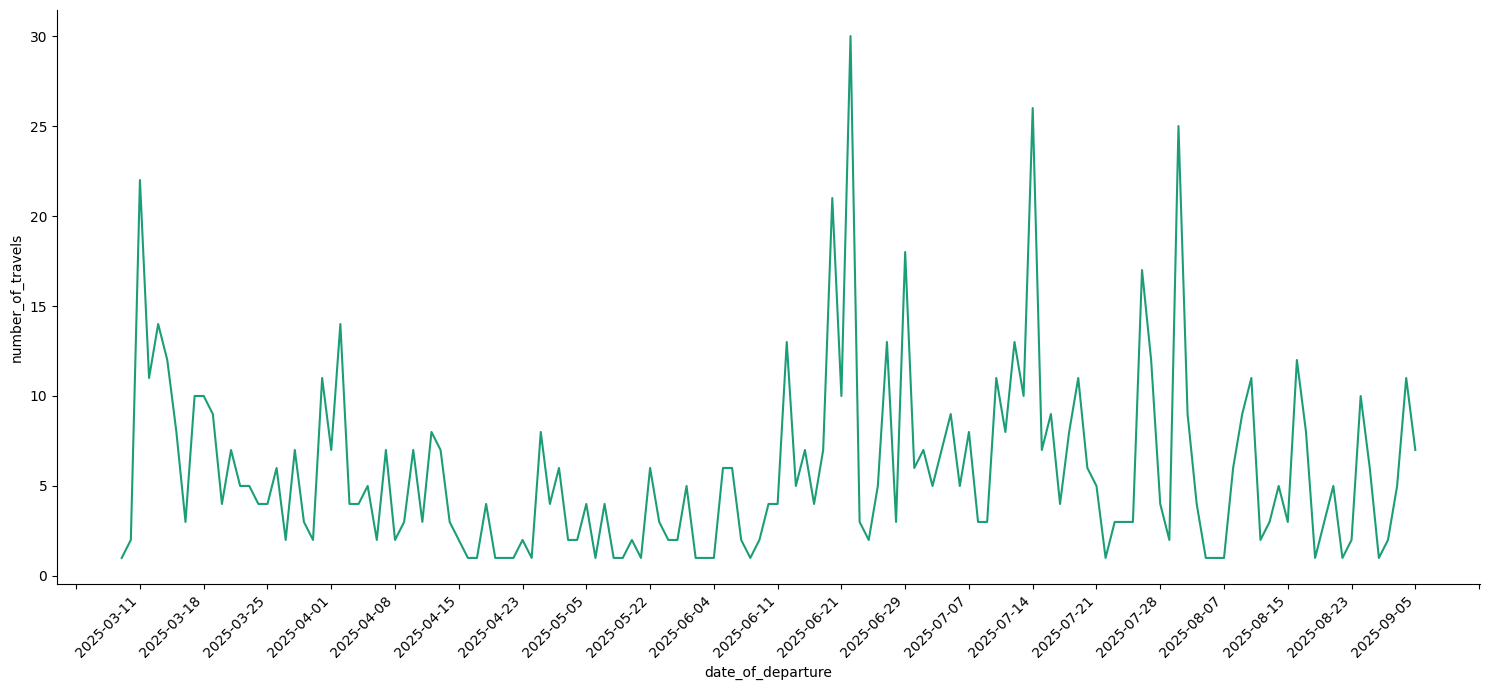

In [ ]:
# prompt: I wish to display dates every 15 days on my X axis
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_of_departure']
  ys = series['number_of_travels']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(15, 7), layout='constrained') # Increase figure size for better visibility
df_sorted = result.sort_values('date_of_departure', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_of_departure')
_ = plt.ylabel('number_of_travels')

# Set the x-axis to display dates every 15 days
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
# ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d')) # Format the date display

plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


I can see 4 main peeks:
1.   Around March 11th: corresponds to last minute travelers (booking within 7 days before departure)
2.   End of June - Early August: summer holidays begins
3. Around July 14th: french national holiday
4. End of July: second wave of holiday departures?



# Create customer segments

Now that we are familiar with the table table, let's answer to my problem by creating user segments.
To begin, lets make it simple: I want to split customers by class & day of travel, for instance: business travel during the week

I already have a class column, what I need now is a weekday of departure

In [ ]:
# prompt: can I get weekday of departure?

df['weekday_departure'] = df['date_time_departure'].dt.dayofweek
# dayofweek returns 0 for Monday and 6 for Sunday

display(df[['date_time_departure','weekday_departure']].head())

,date_time_departure,weekday_departure
0,2025-06-21 09:53:00,5
1,2025-06-15 16:25:00,6
2,2025-03-11 20:00:00,1
3,2025-07-04 11:30:00,4
4,2025-07-04 11:30:00,4


In [ ]:
weekday_distribution = """
SELECT weekday_departure,
  COUNT(order_id) AS number_of_travels,
  CAST(COUNT(order_id) AS REAL) / (SELECT COUNT(order_id) FROM df) * 100 AS percentage_of_total
FROM df
GROUP BY weekday_departure
ORDER BY weekday_departure
"""

result = pysqldf(weekday_distribution)

display(result)

,weekday_departure,number_of_travels,percentage_of_total
0,0,122,14.437870
1,1,78,9.230769
2,2,91,10.769231
3,3,101,11.952663
4,4,128,15.147929
5,5,151,17.869822
6,6,174,20.591716


New column is fine. We can see weekend days get the most travels, followed by monday (late returns from weekends?), and overall distribution is homogeneous (each day has 10-20% of total).

Now lets create a new weekend departure column: Travels during the week are monday-thursday and week-end travels are friday-sunday

In [ ]:
# prompt: I want to new column saying if weekday of departure is weekend or not

df['is_weekend_departure'] = df['weekday_departure'].apply(lambda x: 1 if x >= 4 else 0)

# Display the first few rows to verify the new column
print(df[['date_time_departure', 'weekday_departure', 'is_weekend_departure']].head())

  date_time_departure  weekday_departure  is_weekend_departure
0 2025-06-21 09:53:00                  5                     1
1 2025-06-15 16:25:00                  6                     1
2 2025-03-11 20:00:00                  1                     0
3 2025-07-04 11:30:00                  4                     1
4 2025-07-04 11:30:00                  4                     1


Lets check the distribution of data based on is_weekend_departure

In [ ]:
is_weeekend_distribution = """
SELECT is_weekend_departure,
  COUNT(order_id) AS number_of_travels,
  CAST(COUNT(order_id) AS REAL) / (SELECT COUNT(order_id) FROM df) as percentage_of_total
FROM df
GROUP BY is_weekend_departure
"""

result = pysqldf(is_weeekend_distribution)

display(result)

,is_weekend_departure,number_of_travels,percentage_of_total
0,0,392,0.463905
1,1,453,0.536095


In [ ]:
# prompt: Avec le DataFrame result: provide a pie chart

import altair as alt
chart = alt.Chart(result).mark_arc().encode(theta=alt.Theta(field="number_of_travels", type="quantitative"), color=alt.Color(field="is_weekend_departure", type="nominal"))
chart

alt.Chart(...)

More than half of travels (53%) are done on week-ends, but overall distribution is iso between week-end and week days

Lets split our customers using both class & is_weekend_departure columns to check if customers have different day of travel behavior depending on the class

In [ ]:
segment_split = """
SELECT class, is_weekend_departure,
  COUNT(order_id) AS number_of_travels,
  CAST(COUNT(order_id) AS REAL) / (SELECT COUNT(order_id) FROM df) * 100 AS percentage_of_total
FROM df
GROUP BY class, is_weekend_departure
ORDER BY class, is_weekend_departure
"""

result = pysqldf(segment_split)

display(result)

,class,is_weekend_departure,number_of_travels,percentage_of_total
0,business,0,90,10.650888
1,business,1,97,11.479290
2,executive,0,3,0.355030
3,executive,1,11,1.301775
4,standard,0,299,35.384615
5,standard,1,345,40.828402


Let's remove executive class travels (under 2% of total travels) to avoid noise

In [ ]:
df = df[df['class'] != 'executive']

In [ ]:
result = pysqldf(segment_split)

display(result)

,class,is_weekend_departure,number_of_travels,percentage_of_total
0,business,0,90,10.830325
1,business,1,97,11.672684
2,standard,0,299,35.980746
3,standard,1,345,41.516245


Business travels are equaly splitted between week-end and week days, suggesting this class of travel is not only used by customers traveling for work

On the other hand, standard class travels are more likely to be on week-end days (42 for week-end vs 36% for week days), suggesting standard class travelers is favorite for leisure travels

We have a here first version segmentation based on class & day of travels.

Lets save it for later in this analysis. I will simply name each of these 4 modalities:
1. business week-end
2. business week
3. standard week-end
4. standard week

In [ ]:
# prompt: I want a new travel_type column based on the 4 modalities I mentioned before

def categorize_travel(row):
  if row['class'] == 'business' and row['is_weekend_departure'] == 1:
    return 'business week-end'
  elif row['class'] == 'business' and row['is_weekend_departure'] == 0:
    return 'business week'
  elif row['class'] == 'standard' and row['is_weekend_departure'] == 1:
    return 'standard week-end'
  elif row['class'] == 'standard' and row['is_weekend_departure'] == 0:
    return 'standard week'
  else:
    return 'other' # Handle potential other classes if they were not filtered

df['travel_type'] = df.apply(categorize_travel, axis=1)

# Display the first few rows with the new column
display(df[['class', 'is_weekend_departure', 'travel_type']].head())

,class,is_weekend_departure,travel_type
0,business,1,business week-end
1,standard,1,standard week-end
2,standard,0,standard week
3,standard,1,standard week-end
4,standard,1,standard week-end
